Please upload MSFT Excel file


Saving MSFT.xlsx to MSFT (13).xlsx
Please upload AAPL Excel file


Saving AAPL.xlsx to AAPL (7).xlsx
Please upload JNJ Excel file


Saving JNJ.xlsx to JNJ (6).xlsx

MSFT DataFrame columns: ['Unnamed: 0', '1 MINUTE DAILY MSFT', 'Close']
AAPL DataFrame columns: ['Unnamed: 0', '1 MINUTE APPL', 'Close']
JNJ DataFrame columns: ['Unnamed: 0', '1 MINUTE JNJ', 'Close']
Please enter the column name containing closing prices: Close

Unit Root Tests for MSFT:
ADF Test:
ADF Statistic: -1.5455
p-value: 0.5109
Critical Values: {'1%': np.float64(-3.441169060335662), '5%': np.float64(-2.866313284942438), '10%': np.float64(-2.56931205548122)}
Interpretation:
  - p-value >= 0.05: Fail to reject null - MSFT may be non-stationary

KPSS Test:
KPSS Statistic: 3.1445
p-value: 0.0100
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Interpretation:
  - p-value < 0.05: Reject null hypothesis - MSFT is non-stationary

Unit Root Tests for AAPL:
ADF Test:
ADF Statistic: -1.8901
p-value: 0.3367
Critical Values: {'1%': np.float64(-3.4411511898545206), '5%': np.float64(-2.866305414688104), '10%': np.float64(-2.569307861950

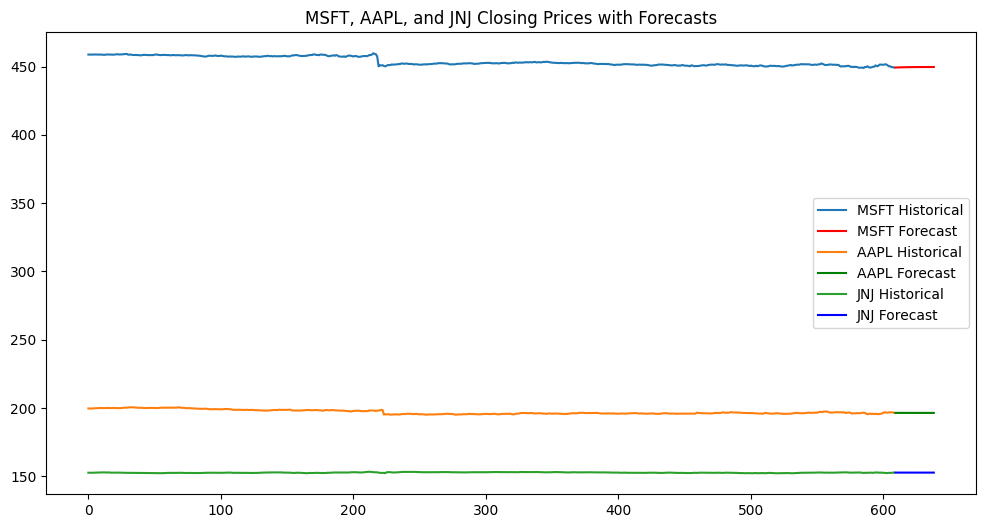

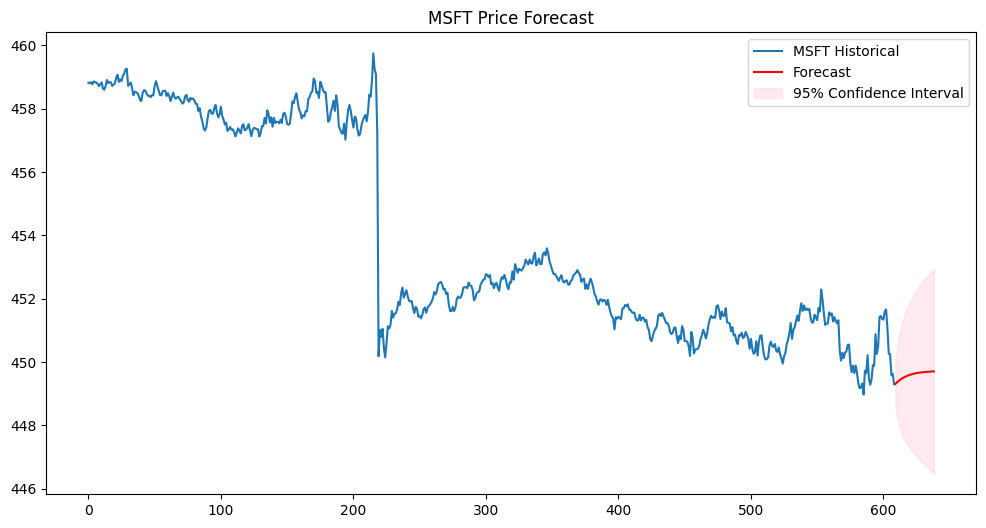


Forecast Interpretation for MSFT:
Last observed value: 449.30
Average forecast value: 449.59
Forecast change: 0.29
Trend: Upward forecast trend
95% CI range at period 30: [446.49, 452.92]


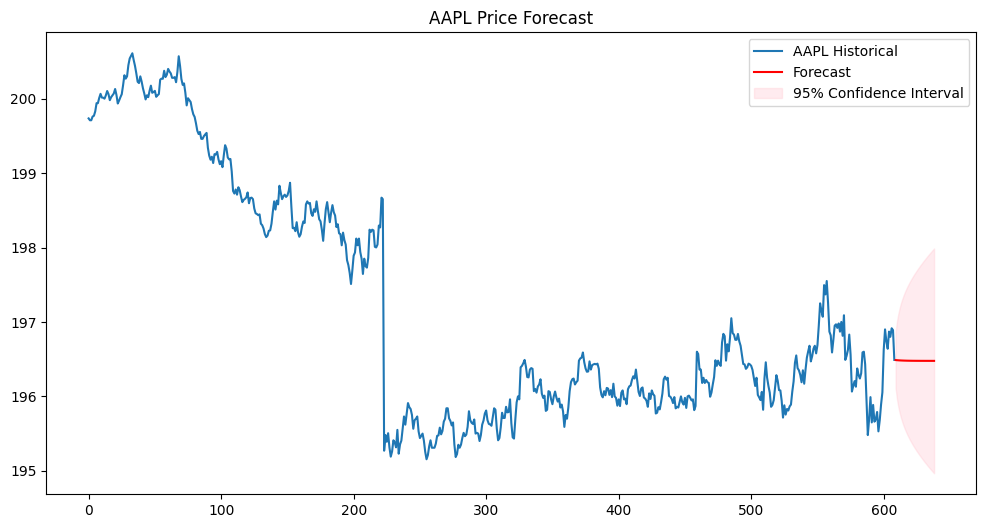


Forecast Interpretation for AAPL:
Last observed value: 196.49
Average forecast value: 196.48
Forecast change: -0.01
Trend: Downward forecast trend
95% CI range at period 30: [194.97, 197.99]


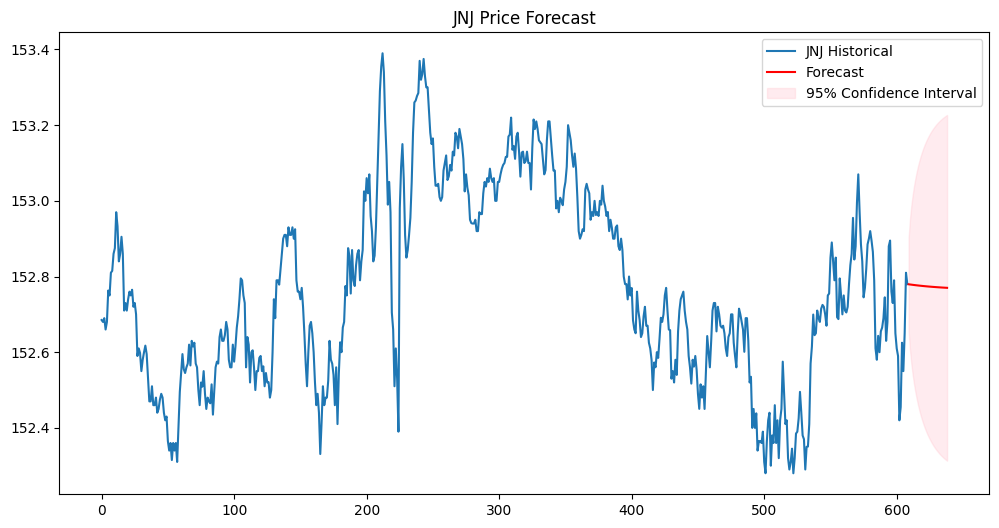


Forecast Interpretation for JNJ:
Last observed value: 152.78
Average forecast value: 152.77
Forecast change: -0.01
Trend: Downward forecast trend
95% CI range at period 30: [152.31, 153.23]

MSFT Forecast Values (next 5 periods):
609    449.309116
610    449.347947
611    449.385910
612    449.420289
613    449.451164
Name: predicted_mean, dtype: float64

AAPL Forecast Values (next 5 periods):
609    196.487942
610    196.486212
611    196.484757
612    196.483534
613    196.482505
Name: predicted_mean, dtype: float64

JNJ Forecast Values (next 5 periods):
609    152.779492
610    152.779001
611    152.778525
612    152.778064
613    152.777619
Name: predicted_mean, dtype: float64


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from google.colab import files
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import matplotlib.pyplot as plt

# Upload Excel files
print("Please upload MSFT Excel file")
msft_upload = files.upload()
msft_filename = list(msft_upload.keys())[0]
msft_df = pd.read_excel(msft_filename)

print("Please upload AAPL Excel file")
aapl_upload = files.upload()
aapl_filename = list(aapl_upload.keys())[0]
aapl_df = pd.read_excel(aapl_filename)

print("Please upload JNJ Excel file")
jnj_upload = files.upload()
jnj_filename = list(jnj_upload.keys())[0]
jnj_df = pd.read_excel(jnj_filename)

# Print available columns
print("\nMSFT DataFrame columns:", list(msft_df.columns))
print("AAPL DataFrame columns:", list(aapl_df.columns))
print("JNJ DataFrame columns:", list(jnj_df.columns))

# Ask user for the correct column name
close_column = input("Please enter the column name containing closing prices: ")

# Extract closing prices using user-specified column name
try:
    msft_close = msft_df[close_column]
    aapl_close = aapl_df[close_column]
    jnj_close = jnj_df[close_column]
except KeyError:
    print(f"Error: Column '{close_column}' not found in one or more DataFrames")
    print("Please check the column names and try again")
    raise

# Ensure all series have the same length
min_length = min(len(msft_close), len(aapl_close), len(jnj_close))
msft_close = msft_close[:min_length]
aapl_close = aapl_close[:min_length]
jnj_close = jnj_close[:min_length]

# Function for unit root tests with interpretation
def unit_root_tests(series, name):
    print(f"\nUnit Root Tests for {name}:")

    # ADF Test
    adf_result = adfuller(series)
    print("ADF Test:")
    print(f'ADF Statistic: {adf_result[0]:.4f}')
    print(f'p-value: {adf_result[1]:.4f}')
    print(f'Critical Values: {adf_result[4]}')
    print("Interpretation:")
    if adf_result[1] < 0.05:
        print(f"  - p-value < 0.05: Reject null hypothesis - {name} is stationary")
    else:
        print(f"  - p-value >= 0.05: Fail to reject null - {name} may be non-stationary")

    # KPSS Test
    kpss_result = kpss(series)
    print("\nKPSS Test:")
    print(f'KPSS Statistic: {kpss_result[0]:.4f}')
    print(f'p-value: {kpss_result[1]:.4f}')
    print(f'Critical Values: {kpss_result[3]}')
    print("Interpretation:")
    if kpss_result[1] < 0.05:
        print(f"  - p-value < 0.05: Reject null hypothesis - {name} is non-stationary")
    else:
        print(f"  - p-value >= 0.05: Fail to reject null - {name} may be stationary")

# Perform unit root tests
unit_root_tests(msft_close, "MSFT")
unit_root_tests(aapl_close, "AAPL")
unit_root_tests(jnj_close, "JNJ")

# Cointegration test with interpretation
def cointegration_test(df):
    result = coint_johansen(df, det_order=0, k_ar_diff=1)
    print("\nJohansen Cointegration Test:")
    print(f"Trace statistic: {result.lr1}")
    print(f"Critical values (90%, 95%, 99%): {result.cvt}")
    print("Interpretation:")
    for i in range(len(result.lr1)):
        if result.lr1[i] > result.cvt[i, 1]:
            print(f"  - r = {i}: Cointegration exists at 95% confidence level")
            print(f"    Trace statistic ({result.lr1[i]:.2f}) > 95% critical value ({result.cvt[i, 1]:.2f})")
        else:
            print(f"  - r = {i}: No cointegration at 95% confidence level")
            print(f"    Trace statistic ({result.lr1[i]:.2f}) <= 95% critical value ({result.cvt[i, 1]:.2f})")
    if result.lr1[0] > result.cvt[0, 1]:
        print("Conclusion: MSFT, AAPL, and JNJ are cointegrated - they share a long-run equilibrium relationship")
    else:
        print("Conclusion: No evidence of cointegration between MSFT, AAPL, and JNJ")

# Prepare data for cointegration
coint_df = pd.DataFrame({
    'MSFT': msft_close,
    'AAPL': aapl_close,
    'JNJ': jnj_close
}).dropna()
cointegration_test(coint_df)

# Function to find best ARIMA model with interpretation
def find_best_arima(series, name, max_p=3, max_d=2, max_q=3):
    best_aic = float('inf')
    best_order = None

    for p in range(max_p + 1):
        for d in range(max_d + 1):
            for q in range(max_q + 1):
                try:
                    model = ARIMA(series, order=(p, d, q))
                    results = model.fit()
                    if results.aic < best_aic:
                        best_aic = results.aic
                        best_order = (p, d, q)
                except:
                    continue

    print(f"\nBest ARIMA model for {name}:")
    print(f"Order: {best_order}")
    print(f"AIC: {best_aic:.2f}")
    print("Interpretation:")
    print(f"  - p={best_order[0]}: {best_order[0]} autoregressive term(s)")
    print(f"  - d={best_order[1]}: {best_order[1]} difference(s) needed for stationarity")
    print(f"  - q={best_order[2]}: {best_order[2]} moving average term(s)")
    return best_order

# Find and fit best ARIMA models
msft_order = find_best_arima(msft_close, "MSFT")
aapl_order = find_best_arima(aapl_close, "AAPL")
jnj_order = find_best_arima(jnj_close, "JNJ")

# Fit final ARIMA models
msft_model = ARIMA(msft_close, order=msft_order).fit()
aapl_model = ARIMA(aapl_close, order=aapl_order).fit()
jnj_model = ARIMA(jnj_close, order=jnj_order).fit()

# Forecast next 30 periods
forecast_steps = 30
msft_forecast = msft_model.forecast(steps=forecast_steps)
aapl_forecast = aapl_model.forecast(steps=forecast_steps)
jnj_forecast = jnj_model.forecast(steps=forecast_steps)

# Create forecast index
last_index = len(msft_close) - 1
forecast_index = range(last_index + 1, last_index + 1 + forecast_steps)

# Plot original series with forecasts
plt.figure(figsize=(12,6))
plt.plot(msft_close, label='MSFT Historical')
plt.plot(forecast_index, msft_forecast, label='MSFT Forecast', color='red')
plt.plot(aapl_close, label='AAPL Historical')
plt.plot(forecast_index, aapl_forecast, label='AAPL Forecast', color='green')
plt.plot(jnj_close, label='JNJ Historical')
plt.plot(forecast_index, jnj_forecast, label='JNJ Forecast', color='blue')
plt.title('MSFT, AAPL, and JNJ Closing Prices with Forecasts')
plt.legend()
plt.show()

# Detailed forecast plot with confidence intervals and interpretation
def plot_forecast(model, series, name, steps=30):
    forecast_obj = model.get_forecast(steps=steps)
    forecast = forecast_obj.predicted_mean
    conf_int = forecast_obj.conf_int()

    forecast_index = range(len(series), len(series) + steps)

    plt.figure(figsize=(12,6))
    plt.plot(series, label=f'{name} Historical')
    plt.plot(forecast_index, forecast, label='Forecast', color='red')
    plt.fill_between(forecast_index,
                    conf_int.iloc[:, 0],
                    conf_int.iloc[:, 1],
                    color='pink',
                    alpha=0.3,
                    label='95% Confidence Interval')
    plt.title(f'{name} Price Forecast')
    plt.legend()
    plt.show()

    # Forecast interpretation
    last_value = series.iloc[-1]
    mean_forecast = forecast.mean()
    print(f"\nForecast Interpretation for {name}:")
    print(f"Last observed value: {last_value:.2f}")
    print(f"Average forecast value: {mean_forecast:.2f}")
    print(f"Forecast change: {mean_forecast - last_value:.2f}")
    if mean_forecast > last_value:
        print("Trend: Upward forecast trend")
    elif mean_forecast < last_value:
        print("Trend: Downward forecast trend")
    else:
        print("Trend: Flat forecast trend")
    print(f"95% CI range at period {steps}: [{conf_int.iloc[-1, 0]:.2f}, {conf_int.iloc[-1, 1]:.2f}]")

# Generate detailed forecast plots and interpretations
plot_forecast(msft_model, msft_close, "MSFT")
plot_forecast(aapl_model, aapl_close, "AAPL")
plot_forecast(jnj_model, jnj_close, "JNJ")

# Print forecast values
print("\nMSFT Forecast Values (next 5 periods):")
print(msft_forecast[:5])
print("\nAAPL Forecast Values (next 5 periods):")
print(aapl_forecast[:5])
print("\nJNJ Forecast Values (next 5 periods):")
print(jnj_forecast[:5])